In [2]:
import tensorflow as Tf
import matplotlib.pyplot as plp

DATOS DE CONEXION API

In [1]:
#Datos de configuracion
ACCESS_ID = '7k8nmm5r8je8xkfa3x8s'
ACCESS_KEY = '120a7baeabcc40d2b1a25072547fcf22'

#Servidor
ENDPOINT = 'https://openapi-ueaz.tuyaus.com'

USERNAME = 'DesinGlasssmartwindows@gmail.com'
PASSWORD = 'DesinGlass0119*'

DEVICE_ID = '60450132500291b103a0'

from tuya_connector import TuyaOpenAPI

openapi = TuyaOpenAPI(ENDPOINT,ACCESS_ID, ACCESS_KEY)
openapi.connect()

{'result': {'access_token': '52177289d6c53e4c278cfc7f21adf7a5',
  'expire_time': 6372,
  'refresh_token': 'd3faf50dbc00c3245eeb33aed7df9bcc',
  'uid': 'bay1674576986329RxJd'},
 'success': True,
 't': 1674685848830,
 'tid': 'eabdb1b29cff11edae6bde37e7487402'}

RED NEURONAL

In [11]:
features = [
        (255,0,0),
        (0,255,0),
        (0,0,255),
        (255,0,0),
        (127,255,0),
        (0,255,255),
        (127,0,255),
        (127,0,4),
        (255,191,0),
        (0,255,63),
        (0,63,255),
        (255,0,191),
        (255,106,0),
        (255,93,0),
        (255,255,0),
        (0,255,157),
        (29,0,255),
        (255,0,97),
        (0,255,165)
]

targets = [0,120,240,0,90,180,270,359,45,135,225,315,25,22,67,157,247,337,159]

CapaEntrada = Tf.keras.layers.Dense(units=3, input_shape=[3])
CapaOculta0 = Tf.keras.layers.Dense(units=3)
CapaOculta1 = Tf.keras.layers.Dense(units=3)
CapaSalida = Tf.keras.layers.Dense(units=1)

Modelo = Tf.keras.Sequential([CapaEntrada,CapaOculta0,CapaOculta1,CapaSalida])

Modelo.compile(
    optimizer=Tf.keras.optimizers.Adam(0.35),
    loss='mean_squared_error'
)

print('Inico de Entrenamiento . . .')
historial = Modelo.fit(features, targets, epochs=1500, verbose=False)
print('Modelo Entrenado')

Inico de Entrenamiento . . .
Modelo Entrenado


GRAFICAR APRENDIZAGE

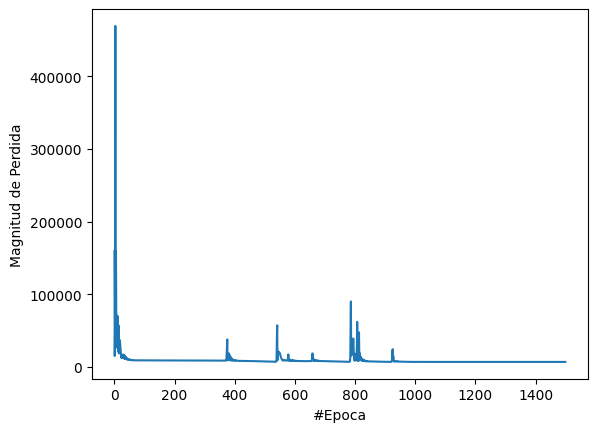

In [12]:
plp.xlabel('#Epoca')
plp.ylabel('Magnitud de Perdida')
plp.plot(historial.history['loss'])
plp.show()

ESTADO DE EL FOCO

In [7]:
respuesta = openapi.get("/v1.0/iot-03/devices/{}/specification".format(DEVICE_ID))
respuesta

{'result': {'category': 'dj',
  'functions': [{'code': 'switch_led',
    'desc': '{}',
    'name': '开关',
    'type': 'Boolean',
    'values': '{}'},
   {'code': 'bright_value',
    'desc': '{"min":25,"scale":0,"unit":"","max":255,"step":1}',
    'name': '亮度',
    'type': 'Integer',
    'values': '{"min":25,"scale":0,"unit":"","max":255,"step":1}'},
   {'code': 'work_mode',
    'desc': '{"range":["white","colour"]}',
    'name': '工作模式',
    'type': 'Enum',
    'values': '{"range":["white","colour"]}'},
   {'code': 'colour_data',
    'desc': '{"h":{"min":1,"scale":0,"unit":"","max":360,"step":1},"s":{"min":1,"scale":0,"unit":"","max":255,"step":1},"v":{"min":1,"scale":0,"unit":"","max":255,"step":1}}',
    'name': '彩光模式数',
    'type': 'Json',
    'values': '{"h":{"min":1,"scale":0,"unit":"","max":360,"step":1},"s":{"min":1,"scale":0,"unit":"","max":255,"step":1},"v":{"min":1,"scale":0,"unit":"","max":255,"step":1}}'},
   {'code': 'scene_data',
    'desc': '{"h":{"min":1,"scale":0,"unit":

ENCENDIDO / APAGADO

In [8]:
Estado = True

command = {"commands":[{"code":"switch_led","value":Estado}]} 
openapi.post("/v1.0/iot-03/devices/{}/commands" .format(DEVICE_ID), command)

{'result': True,
 'success': True,
 't': 1674685978464,
 'tid': '37fb61a09d0011edae6bde37e7487402'}

CAMBIAR COLOR

In [13]:
R = 0
G = 255
B = 0
S = 100
L = 100

resultado = Modelo.predict([(R,G,B)])
resultado = resultado[0][0]

print(resultado)

H = resultado
S = S
V = L 

command = {"commands":[{"code":"colour_data","value":{"h":H,"s":S, "v":V}}]} 
openapi.post("/v1.0/iot-03/devices/{}/commands" .format(DEVICE_ID), command)

1/1 [==============================] - 0s 68ms/step
95.02248


TypeError: Object of type float32 is not JSON serializable